# 페르마의 정리
   > n이 2보다 큰 자연수인 경우에 a<sup>n</sup> + b<sup>n</sup> = c<sup>n</sup> 이 되는 자연수 a, b, c 는 존재하지 않는다  
   > n이 3이고 a, b, c가 1부터 10까지 자연수 일 때 페르마의 마지막 정리가 사실임을 증명하시오  
- (for문을 이용하여 증명하시오)

In [10]:
for a in range(1, 11, 1) :
    for b in range(1, 11, 1) : 
        for c in range(1, 11, 1) : 
            if (a * a * a) + (b * b * b) == (c * c * c) : 
                print("페르마의 마지막 정리는 사실이 아님.")
else :
    print("페르마의 마지막 정리가 사실임")

페르마의 마지막 정리가 사실임


# max() 함수 만들기
1. max() 함수는 개수가 가변인 인자의 값들을 비교하여 가장 큰 수를 돌려주는 함수이다. 
2. 이 함수와 같은 행동를 하는 함수를 생성
    - 개수가 가변인 매개변수 생성
    - for문과 if문을 이용하여 함수를 생성

In [27]:
def max(*args) :
    max = args[0]
    for num in args :
        if num > max :
            max = num
    print(max)

In [28]:
max(1, 10, 100, 1000, 10000)

10000


In [29]:
max(9, 8, 7, 6, 5, 4, 3, 2, 1, 0)

9


In [30]:
max(-10, -9, -8, -7, -6, -5, -4, -3, -2, -1)

-1


# 카드 이용 내역

- test_csv 폴더의 유통+업종 데이터를 로드하여 문제를 푸시오

1. 각 컬럼의 이름을 변경 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
2. 기준년월을 시계열로 변경
3. index를 기준년월 변경
4. 데이터를 확인하여서 굉장히 이상한 데이터가 존재 체크
5. 성별 컬럼의 데이터 값을 1은 남자, 2는 여자 변경
6. 남, 녀 성별을 기준으로 연도별 건당 이용 금액의 평균이 몇인지 출력 & 시각화

In [213]:
import pandas as pd

In [196]:
df = pd.read_csv("../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv", encoding = "euc-kr")

In [ ]:
df.columns

In [197]:
# 1. 각 컬럼의 이름을 변경 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
df.columns = ["기준년월", "업종", "성별", "연령대", "총이용건수", "총이용금액"]

In [ ]:
df.head()

In [198]:
# 2. 기준년월을 시계열로 변경
df["기준년월"] = pd.to_datetime(df["기준년월"], format = "%Y%m")

In [ ]:
df.head()

In [199]:
# 3. index를 기준년월로 변경
df = df.set_index(["기준년월"])
df

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7.600000e+03
2019-01-01,백화점,1,10,379,1.945872e+07
2019-01-01,백화점,1,20,45173,4.747711e+09
2019-01-01,백화점,1,30,271858,2.791826e+10
2019-01-01,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...
2021-09-01,편의점,2,50,844081,6.283353e+09
2021-09-01,편의점,2,60,243768,1.997442e+09
2021-09-01,편의점,2,70,40523,3.524203e+08


In [200]:
# 4. 데이터를 확인하여서 굉장히 이상한 데이터가 존재 체크
(df[["총이용건수", "총이용금액"]] < 0).any(0)

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_20324\3434080804.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  (df[["총이용건수", "총이용금액"]] < 0).any(0)


총이용건수    False
총이용금액    False
dtype: bool

In [201]:
df["성별"].value_counts()

2    1336
1    1312
Name: 성별, dtype: int64

In [202]:
df["연령대"].value_counts()

10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: 연령대, dtype: int64

In [204]:
# 연령대가 0인 데이터를 제외
df_2 = df[~(df["연령대"] == 0)]

In [206]:
# 5. 성별 컬럼의 데이터 값을 1은 남자, 2는 여자 변경
df_2["성별"] = df_2["성별"].apply(lambda x : "남자" if x == 1 else "여자")

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_20324\2388679045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["성별"] = df_2["성별"].apply(lambda x : "남자" if x == 1 else "여자")


In [208]:
# 6. 남, 녀 성별을 기준으로 연도별 건당 이용 금액의 평균이 몇인지 출력 & 시각화
# 연도 컬럼을 생성
df_2["연도"] = df_2.index.strftime("%Y")

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_20324\3410625774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["연도"] = df_2.index.strftime("%Y")


In [209]:
# 건당 평균 금액 컬럼 생성
df_2["건당이용금액"] = df_2["총이용금액"] / df_2["총이용건수"]

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_20324\2804377230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["건당이용금액"] = df_2["총이용금액"] / df_2["총이용건수"]


In [210]:
pivot = pd.pivot_table(
    df_2,         # 기준이 되는 데이터프레임
    index = "연도", # 연도로 그룹화
    columns = "성별", # 성별로 분할
    values = "건당이용금액",  # 그룹화된 데이터들의 총 이용금액을 선택
    aggfunc = "mean" # 건당이용금액의 평균
)

In [216]:
pivot

성별,남자,여자
연도,,
2019,39670.894902,37936.085012
2020,45283.490754,42269.743826
2021,48623.260587,44866.351576


<AxesSubplot: xlabel='연도'>

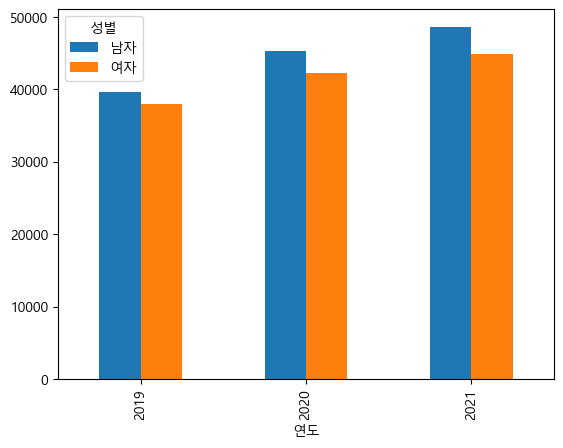

In [221]:
pivot.plot.bar()

In [220]:
# 한글 깨짐 방지
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin" : #MAC인 경우
    plt.rc("font", family = "AppleGothic")
else :
    plt.rc("font", family = "Malgun Gothic")

## 온라인 카드 매출과 오프라인 카드매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
3. 1,2번과정에서 나온 데이터를 plot 그래프를 그려서 차이를 확인
4. 2개의 데이터프레임을 단순한 행 결합
    - df_online에 업종 파생 변수 생성 값은 "온라인"
    - df와 df_online 데이터프레임을 행 결합
    - 월별, 업종별로 총 이용 금액을 pivot_table을 이용하여 그래프 시각화

In [222]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7.600000e+03
2019-01-01,백화점,1,10,379,1.945872e+07
2019-01-01,백화점,1,20,45173,4.747711e+09
2019-01-01,백화점,1,30,271858,2.791826e+10
2019-01-01,백화점,1,40,391109,3.791149e+10


In [ ]:
# 인덱스를 기준으로 그룹화 총이용금액의 합계
group_df = df.groupby(df.index).sum()["총이용금액"]
group_df

In [232]:
df_online = pd.read_csv("../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv")

In [234]:
# 컬럼을 이름 변경
df_online.columns = ["기준년월", "성별", "연령대", "총이용건수", "총이용금액"]

In [229]:
# 기준년월 시계열 변경 -> 인덱스로 변경
df_online["기준년월"] = pd.to_datetime(df_online["기준년월"], format = "%Y")

ValueError: unconverted data remains: 01

In [ ]:
group_df_online = df_online.groupby(df_online.index).sum()["총이용금액"]

In [ ]:
group_df_online

In [ ]:
# 두 개의 그룹화 데이터를 시각화
plt.figure(figsize = (14, 6))
plt.grid(True, axis = "y")
plt.plot(group_df, label = "오프라인")
plt.plot(group_df_online, label = "온라인")
plt.legend()
plt.show()

In [ ]:
# 두 개의 데이터프레임 결합
# online 데이터에는 업종 컬럼이 존재하지 않는다.
df_online["업종"] = "온라인"

In [ ]:
# 데이터프레임의 단순한 행 결합
total_df = pd.concat((df, df_online), axis = 0)

In [ ]:
pivot_table = pd.pivot_table(
    total_df,
    index = total_df.index,
    columns = "업종",
    aggfunc = sum,
    values = "총이용금액"
    )

In [ ]:
pivot_table

In [ ]:
pivot_table.plot

In [ ]:
# 지수 표현 없이 출력 세팅
pd.options_display.float_format = "{:2f}".format